#Versuch 4 - Schallgeschwindigkeit in Luft

##Aufgabe 1 - Messung der Schallgeschwindigkeit nach dem Laufzeitverfahren

In folgenden Versuch sollte die Schallgeschwindigkeit ermittelt werden. Hierzu wurden Lichtsensor und Mikrofon des IOLab-Geräts aktiviert und in 3,4 Meter Entfernung das Licht einer Taschenlampe auf das IOLab-Gerät gerichtet. Dann wurde das Licht durch eine schmale Holzplatte unterbrochen, die knapp vor der Taschenlampe mit Schwung auf den Tisch geklappt wurde, sodass ein gut hörbarer Ton entstanden ist. Im Versuch wurde die Lichtgeschwindigkeit als unendlich angenommen, da die Unterbrechung des Lichts den Start des Versuchs bestimmt. Der Klang der Holzscheibe auf dem Tisch braucht dann natürlich länger bis zum Mikrofon des IOLab-Geräts. Die Schallgeschwindigkeit kann dann einfach aus den Werten des IOLab-Geräts errechnet werden mit:

$v_{Schall} = \frac{s}{Δt}$

Hierbei beschreibt s die Strecke zwischen Taschenlampe bzw. Holzscheibe und dem IOLab-Gerät und $Δt$ beschreibt die Zeit zwischen keinem Licht mehr am Sensor des IOLab-Geräts bis zum Eintreffen des Tons der Holzplatte.

Für meine Messung ergab sich für $Δt$ folgender Wert, die Unsicherheit wurde anhand der Schwankungen geschätzt:

$Δt = 0,010±0,003s$

Für die Strecke s habe ich meine Messungenauigkeit wegen der großen Strecke von 3,4 Metern auf einen Zentimeter geschätzt:

$s = 3,40±0,01m$

In [8]:
#!pip install uncertainties
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy import optimize
from numpy import arange
import statistics
import math
import pandas as pd
from uncertainties import ufloat
from uncertainties.umath import *
from google.colab import files
from IPython.display import Image

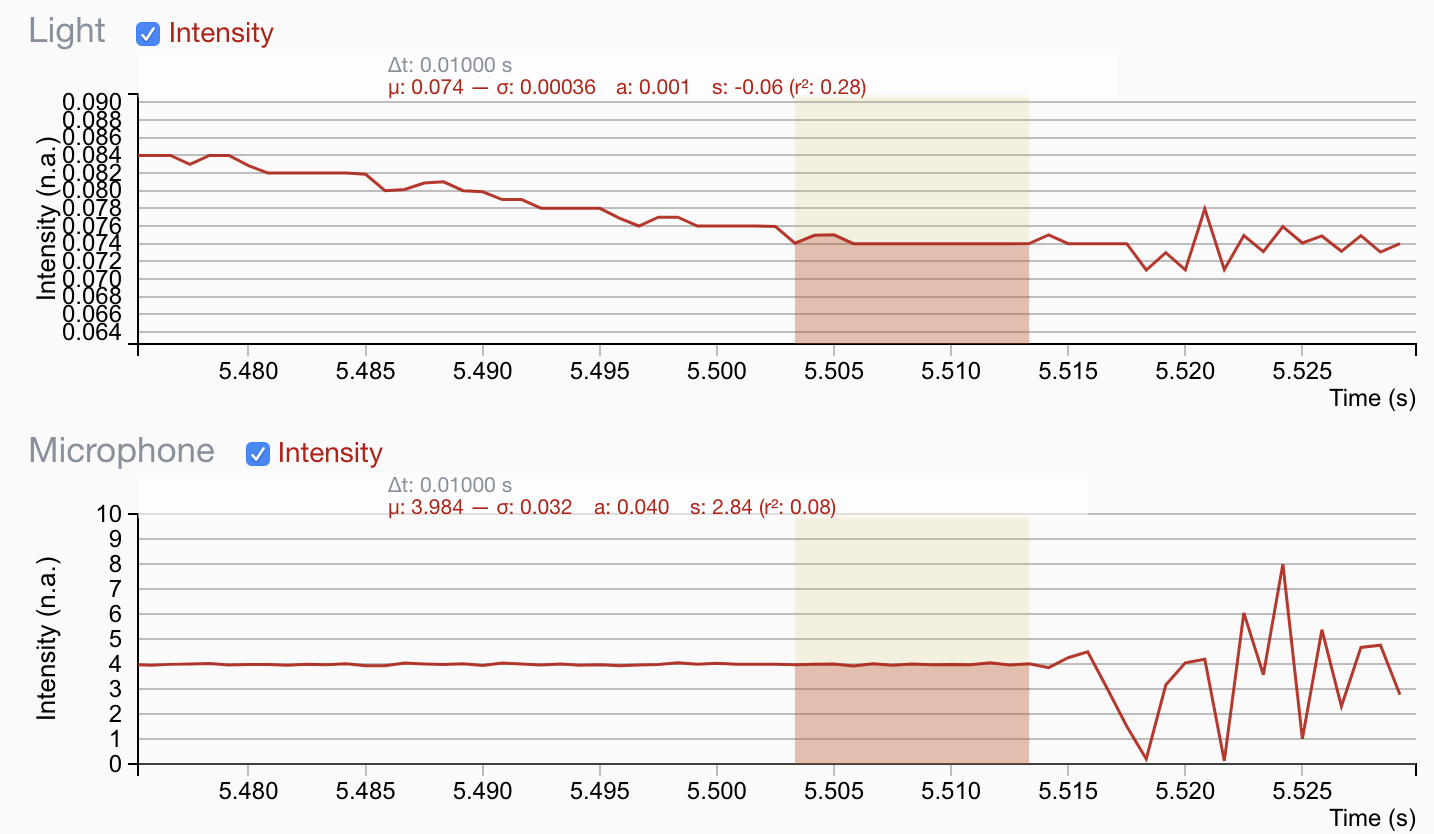

In [4]:
s = ufloat(3.4, 0.01)
t = ufloat(0.01, 0.003)
v = s/t
Image('Image1.png', width = 1200)

Es ergibt sich für die Schallgeschwindigkeit:

$v_{Schall} = \frac{s}{Δt} = 340±100\frac{m}{s}$

Die Unsicherheit wurde hierbei über die Fehlerfortpflanzung errechnet. Sie fällt sehr groß aus, da die Strecke sehr klein ist im Gegensatz zu der sehr hohen Schallgeschwindigkeit. Außerdem ist das Zeitintervall sehr klein und deshalb auch dessen Fehler realtiv groß. Trotzdem liegt meine Messung sehr gut auf dem Literaturwert von 343,2$\frac{m}{s}$. Dieser ist allerdings noch Temperatur abhängig was in unserem Experiment garnicht berrücksichtigt wurde und deshalb einen potentiellen systematischen Fehler mit sich bringen könnte.

# Augabe 2 - Messung der Schallgeschwindigkeit nach dem Resonanzverfahren

Im folgenden Versuch soll wieder die Schallgeschwindigekit bestimmt werden, dieses Mal allerdings über die Ressonanzfrequenzen von stehenden Wellen. Hierzu wurde ein Rohr was zuvor aus Papier gerollt wurde an das IOLab-Gerät angebracht, sodass das Mikrofon in der Mitte des Rohres ist und die Röhre zum IOLab-Gerät hin gut abgedichtet ist, um ein möglichst schallhartes Rohrende zu simulieren. Der Durchmesser d und die Länge l meiner Papierröhre, sowie derren Unsicherheiten sind in folgendem angegeben. Die Unsicherheiten ergeben sich hierbei durch Messfehler und wurden von mir geschätzt:

$d = 3,5±0,1cm$

$l = 42±1cm$

Nun wurde am anderen Ende der Papierröhre Kopfhörer plaziert, die über 60 Sekunden einen sinus-förmigen Ton abspielten, dessen Frequenz kontinuierlich von 500 Hz auf 5000 Hz anstieg. Durch das Mikrofon des IOLab-Geräts lässt sich erkennen, dass die Papierröhre als Resonator fungiert und sich in ihr eine Stehendewelle bildet. Das zugehörige Intensitätsmaxima kann dann durch eine Fast Fourier Transformation als Resonantsfrquenz interpretiert werden. Durch die Öffung der Röhre hat der Resonator eine größere Länge als das Rohr, diese zusätzliche Länge wird mit der Mündungskorrektur ausgeglichen. Die effektive Länge wurde dann durch folgende Formeln berechnet:

$s = 0,6D$

$L_{eff} = L + s$

Die Schallgeschwindigkeit kann nun mit der ermittelten Länge und Frequenz durch die folgende Formel bestimmt werden:

$c_{phase} = 2L_{eff} * (f_{n+1} - f_n)$

Der zugehörige Fehler wird wieder über Fehlerfortpflanzung bestimmt.

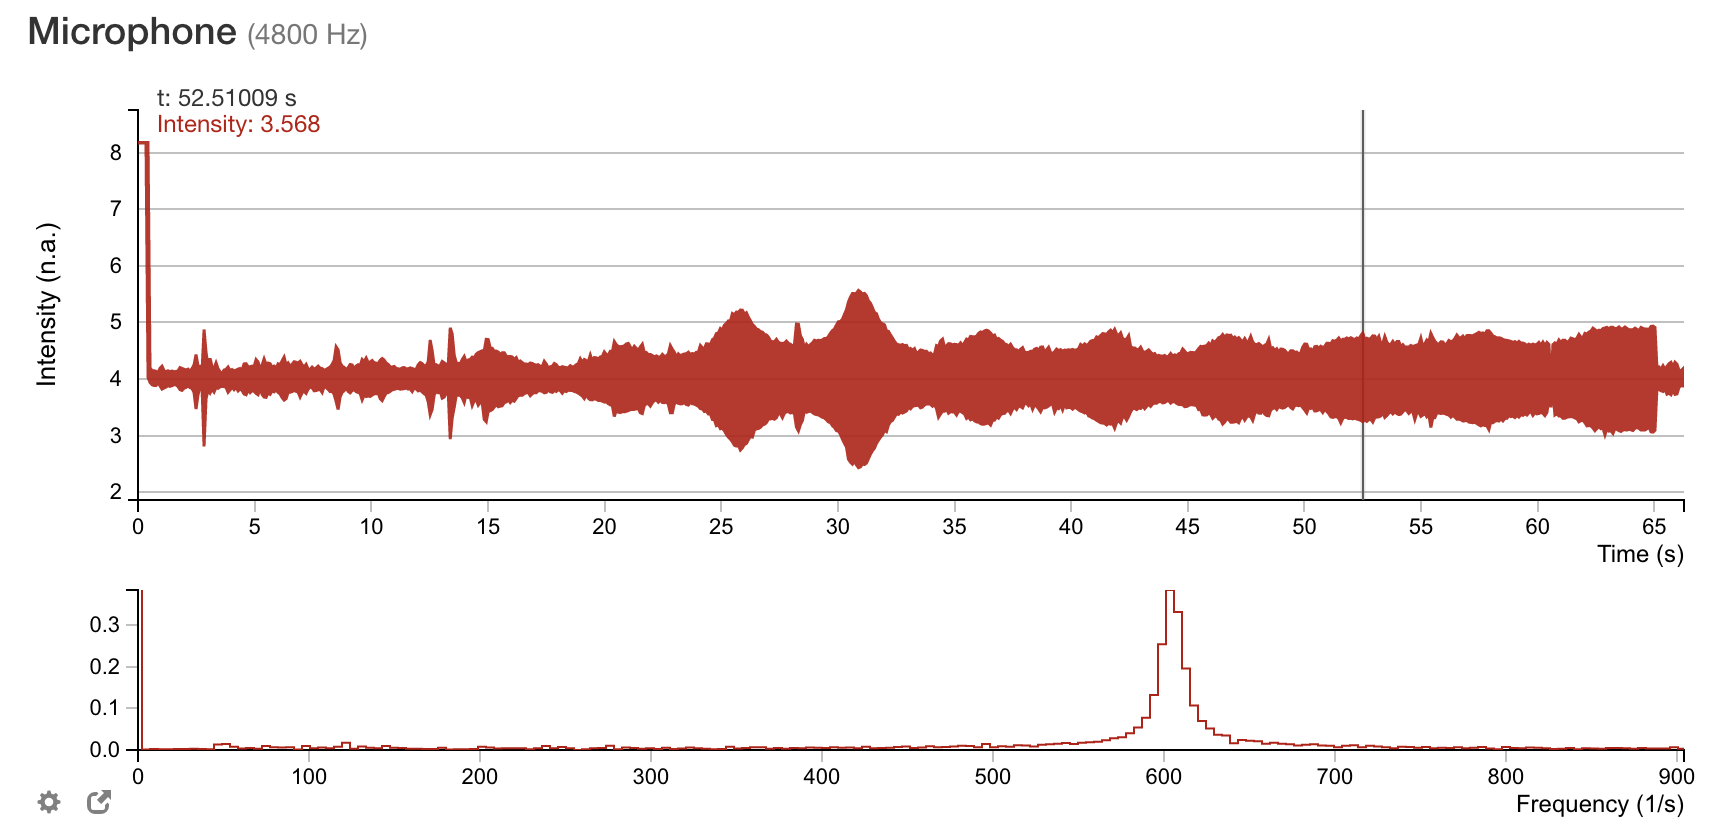

In [7]:
Image('Image2.png', width = 1200)


In [6]:
L = ufloat(0.42, 0.01)
D = ufloat(0.035, 0.001)
s = 0.6*D
Leff = L + s
#print(Leff)
F1 = ufloat(200, 25)
F2 = ufloat(600, 25)
F3 = ufloat(1025, 25)
F4 = ufloat(1400, 25)
F5 = ufloat(1815, 25)
F6 = ufloat(2225, 25)

D1 = F2 - F1
D2 = F3 - F2
D3 = F4 - F3
D4 = F5 - F4
D5 = F6 - F5

V1 = 2*Leff*D1
V2 = 2*Leff*D2
V3 = 2*Leff*D3
V4 = 2*Leff*D4
V5 = 2*Leff*D5

In [7]:
from pandas.core.ops.common import F
data = [[F1.nominal_value, F1.std_dev, D1.nominal_value, '{:.2f}'.format(D1.std_dev), '{:.2f}'.format(V1.nominal_value), '{:.2f}'.format(V1.std_dev)],
        [F2.nominal_value, F2.std_dev, D2.nominal_value, '{:.2f}'.format(D2.std_dev), '{:.2f}'.format(V2.nominal_value), '{:.2f}'.format(V2.std_dev)],
        [F3.nominal_value, F3.std_dev, D3.nominal_value, '{:.2f}'.format(D3.std_dev), '{:.2f}'.format(V3.nominal_value), '{:.2f}'.format(V3.std_dev)],
        [F4.nominal_value, F4.std_dev, D4.nominal_value, '{:.2f}'.format(D4.std_dev), '{:.2f}'.format(V4.nominal_value), '{:.2f}'.format(V4.std_dev)],
        [F5.nominal_value, F5.std_dev, D5.nominal_value, '{:.2f}'.format(D5.std_dev), '{:.2f}'.format(V5.nominal_value), '{:.2f}'.format(V5.std_dev)],
        [F6.nominal_value, F6.std_dev,'-','-','-','-']]
df = pd.DataFrame(data, columns = ['Frequenz beim Intensitätsmaxima in Hz','Resonanzfehler in Hz', 'Abstand Intensitätsmaxima in Hz', 'Resonanzfehler des Abstandes in Hz', 'Schallgeschwindigkeit', 'Fehler der Schallgeschwindigkeit'])
df.head(6)

,Frequenz beim Intensitätsmaxima in Hz,Resonanzfehler in Hz,Abstand Intensitätsmaxima in Hz,Resonanzfehler des Abstandes in Hz,Schallgeschwindigkeit,Fehler der Schallgeschwindigkeit
0,200.0,25.0,400.0,35.36,352.80,32.20
1,600.0,25.0,425.0,35.36,374.85,32.33
2,1025.0,25.0,375.0,35.36,330.75,32.08
3,1400.0,25.0,415.0,35.36,366.03,32.27
4,1815.0,25.0,410.0,35.36,361.62,32.25
5,2225.0,25.0,-,-,-,-


In [8]:
MV = (V1+V2+V3+V4+V5)/5
#print(MV)

Der Mittelwert der ermittelten Schallgeschwindigkeiten ergibt dann $c_{phase} = 357±10\frac{m}{s}$. Dieser Wert liegt relativ nah am Literaturwert der Schallgeschwindigkeit. Der Fehler ergibt sich durch eine nicht optimale effektiv Länge des Rohres, dass heißt Länge, Durchmesser und Mündungskorrektur können noch angepasst werden.

#Aufgabe 3 - Berechnung der Schallgeschwindigkeit

Die Schallgeschwindigkeit soll nun aus räumlichen Konstanten genau berechnet werden. Dabei ist die Schallgeschwindigkeit abhängig von der Temperatur $T = 300K$, dem adiabatischer Koeffizient $γ_{Luft} = 1,4$, der Gaskonstante $R = 8,3143\frac{J}{K*mol}$ und der Masse des Gases $m_{Luft} = 0,028973\frac{kg}{mol}$.

Mit der folgenden Formel lässt sich dann die Schallgeschwindigkeit bestimmen:
$c_{ad}=\sqrt{\frac{γ_{Luft}*R*T}{m_{Luft}}} = 347,17\frac{m}{s}$

Im Vergleich mit den experimentellen Werten ist zu erkennen, dass bei beiden Experimenten die berechneten Schallgeschwindigkeiten im experimentellen Fehlerbereich liegen.
 
Der große Unterschied zwischen den berechneten Schallgeschwindigkeiten beim Laufzeit- und Resonanzverfahren ist, dass der Fehler beim Resonanzverfahren sehr viel genauer ist. Auf die Gründe für diese Tatsache wurde hierbei schon in Aufgabe 1 und 2 eingegangen. Desweiteren wurde beim Laufzeitverfahren die Gruppengeschwindigkeit bestimmt, da die Ausbreitung der Wellenfront betrachtet wird. Dagegen wurde beim Resonanzverfahren die Phasengeschwindigkeit bestimmt, da die Schallgeschwindigkeit anhand einer Frequenz berechnet wurde.

Der Adiabatenkoeffizient ist durch $γ = \frac{C_P}{C_V} = \frac{f+2}{f}$ beschrieben. Dabei gibt $C_P$ die Kapazität der Druckveränderung und $C_V$ die Kapazität der Volumenänderung an. Diese Relation kann bei Gasen auch über die Anzahl der Freiheitsgrad $f$ des Atoms beschrieben werden. Da sich in der Luft fast ausschließlich Molekühle mit 2 Atomen befinden, die einen Freiheitsgrad von 5 besitzen (2 Rotationsrichtungen und 3 Raumrichtungen), ergibt sich für $γ_{Luft} = 1,4$. 

Amplitude der Teilchenbewegung $ζ_0$:

$ζ_0 = \frac{p_0}{ρ * c * 2πf} = 3,862 * 10^{-5}m$

Amplitude der Teilchengeschwindigkeit $v_0$:

$v_0 = ζ_0 * ω = ζ_0 * 2πf = 0,243 \frac{m}{s}$

Amplitude der Dichteschwankung $ρ_0$:

$ρ_0 = ρ * v_0 = 0,291 \frac{kg}{s * m^2}$




